In [1]:
from tensorflow import keras
import tensorflow as tf
from lib.utils import model, gan, preprocess,build

# Final MNIST models with Sigmoid activation

In [2]:
# We only store the training and test data without labels
(x,_), (y,_) = keras.datasets.mnist.load_data()
#resolution and number of channels
res = 28
channel = 1
# Preprocessing data with custom function
batch_size = 64
dataset = preprocess.preprocess_Data(x,y, False,res,channel,b_size=batch_size, isTanh=True)
#Essentials
img_shape = (res,res,channel)
epochs = 30
latent_dim = 100
#number of images to sample
n_images = 16
#seed matrix of random gaussian for tracking the same samples over training
s = tf.random.normal([n_images, latent_dim])
#to calculate losses
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
# directories
checkpoint_dir = '../../../checkpoints/mnist_checkpoints/asc/batch'
image_dir = "../../../oDig/mnist/asc/batch"
image_freq = 10
#optimizers
d_optimizer = build.d_optimizer(0.0002)
g_optimizer = build.g_optimizer(0.0002)

2022-04-02 10:06:46.497222: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-02 10:06:46.528584: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-02 10:06:46.529058: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-02 10:06:46.573406: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
name = 'AB14-Sig-MultiDrop'
model14 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=7,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=1,
                             is_multi_drop=True,
                             is_batchnorm=True,
                             is_tanh=False
                             )
gen14, disc14 = model.build(model14)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 3136)              316736    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 3136)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 128)      131200    
 nspose)                                                         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 128)       0         
                                                         

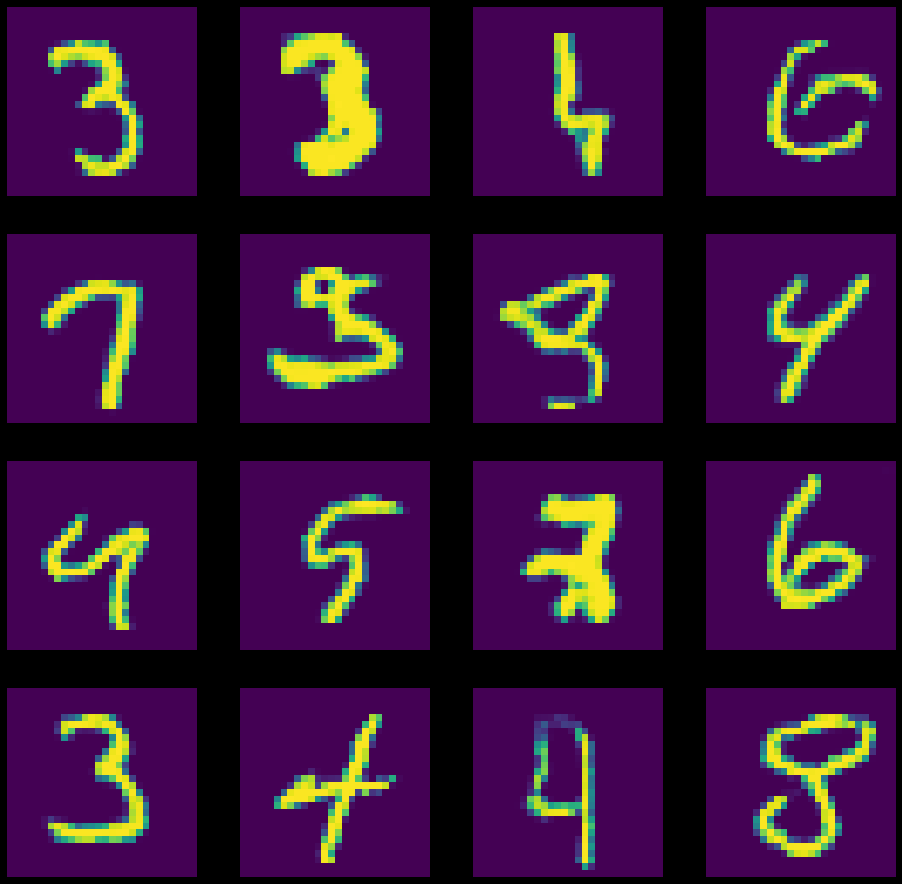

None
2188/2188 [==============================] - 40s 18ms/step - d_loss: 0.6756 - g_loss: 0.6997


In [4]:
g = gan.GAN(g=gen14, d=disc14, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

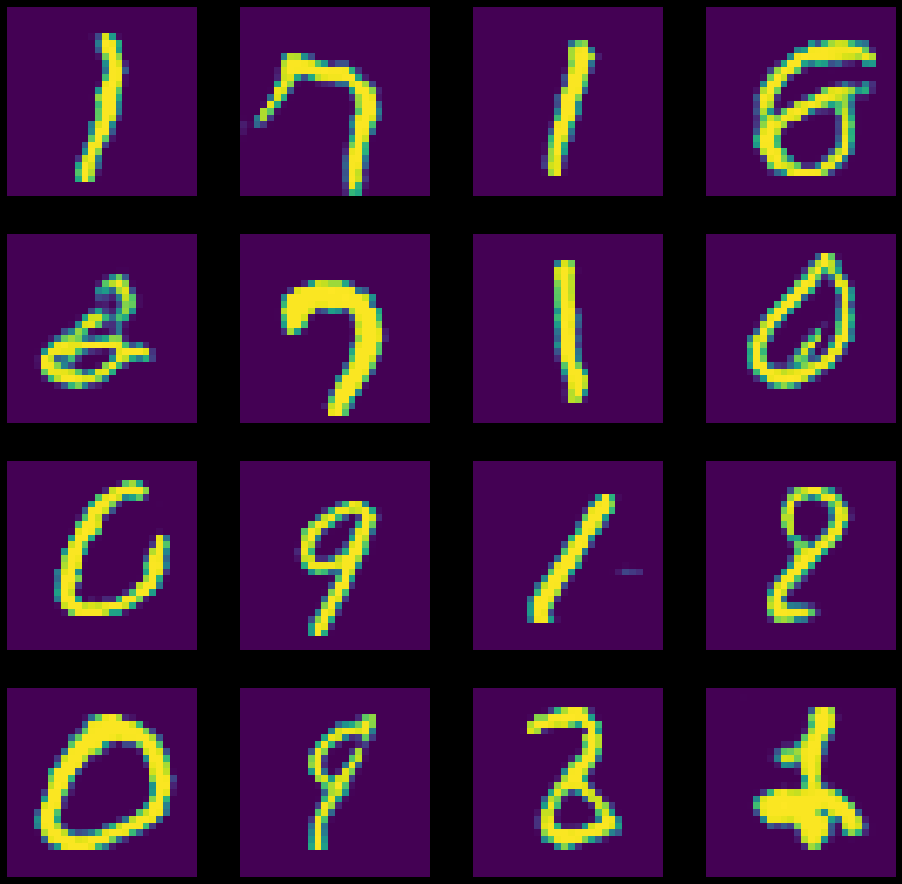

None
2188/2188 [==============================] - 50s 23ms/step - d_loss: 0.6278 - g_loss: 0.8539


In [5]:
name = 'A_B_15-Sig-MultiDrop'
model15 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=7,
                              latent_dim=latent_dim,
                              filter_mode=1,
                              is_multi_drop=True,
                              is_batchnorm=True,
                              is_tanh=False
                              )
gen15, disc15 = model.build(model15)
g = gan.GAN(g=gen15, d=disc15, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs,
      callbacks=[gan.GANCallback(num_img=n_images, iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [6]:
name = 'A_B_19-Sig-OneDrop'
model19 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=7,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=1,
                             is_multi_drop=False,
                             is_batchnorm=True,
                             is_tanh=False
                             )
gen19, disc19 = model.build(model19)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_4 (Dense)             (None, 3136)              316736    
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 3136)              0         
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 14, 14, 128)      131200    
 ranspose)                                                       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

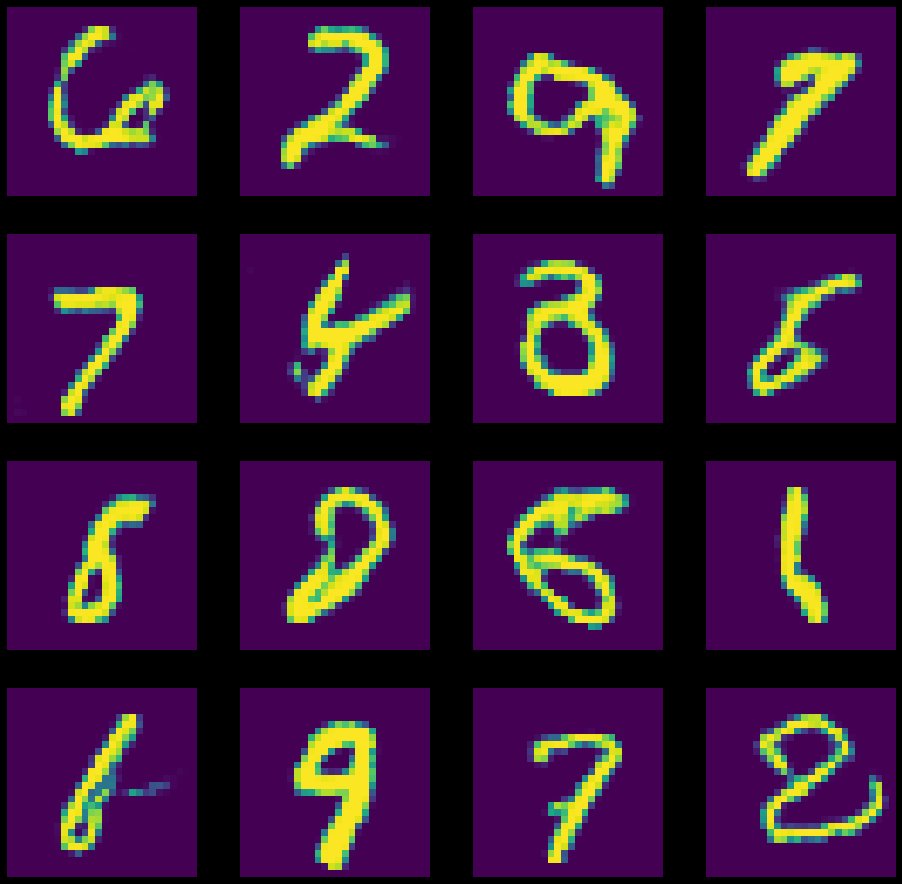

None
2188/2188 [==============================] - 40s 18ms/step - d_loss: 0.6712 - g_loss: 0.7130


In [7]:
g = gan.GAN(g=gen19, d=disc19, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [8]:
name = 'A_B_20-Sig-OneDrop'
model20 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=7,
                              latent_dim=latent_dim,
                              filter_mode=1,
                              is_multi_drop=False,
                              is_batchnorm=True,
                              is_tanh=False
                              )
gen20, disc20 = model.build(model20)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_6 (Dense)             (None, 3136)              316736    
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 3136)              0         
                                                                 
 reshape_3 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_9 (Conv2DT  (None, 14, 14, 128)      131200    
 ranspose)                                                       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

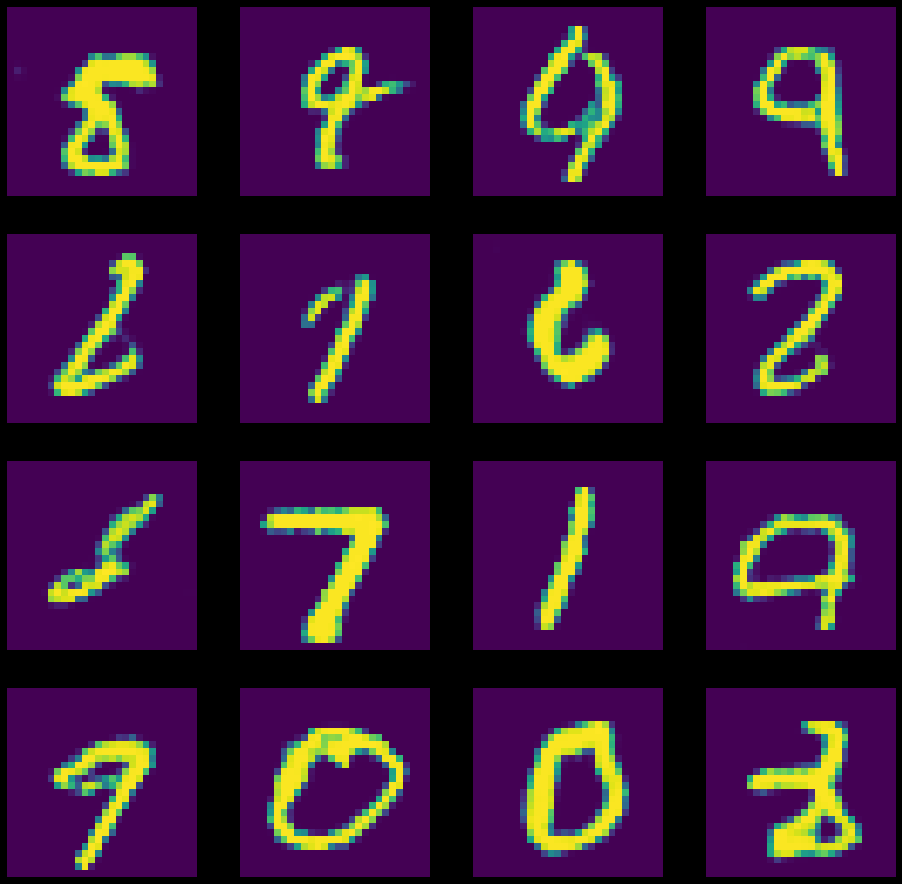

None
2188/2188 [==============================] - 50s 23ms/step - d_loss: 0.6319 - g_loss: 0.8456


In [9]:
g = gan.GAN(g=gen20, d=disc20, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs,
      callbacks=[gan.GANCallback(num_img=n_images, iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [10]:
name = 'D_B_12-Sig-MultiDrop'
model12 = model.ModelSettings(model_name=name,
                             gen_filter=6,
                             disc_filter=6,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=True,
                             is_batchnorm=True,
                             is_tanh=False
                             )
gen12, disc12 = model.build(model12)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_8 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_4 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_12 (Conv2D  (None, 14, 14, 64)       131136    
 Transpose)                                                      
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                         

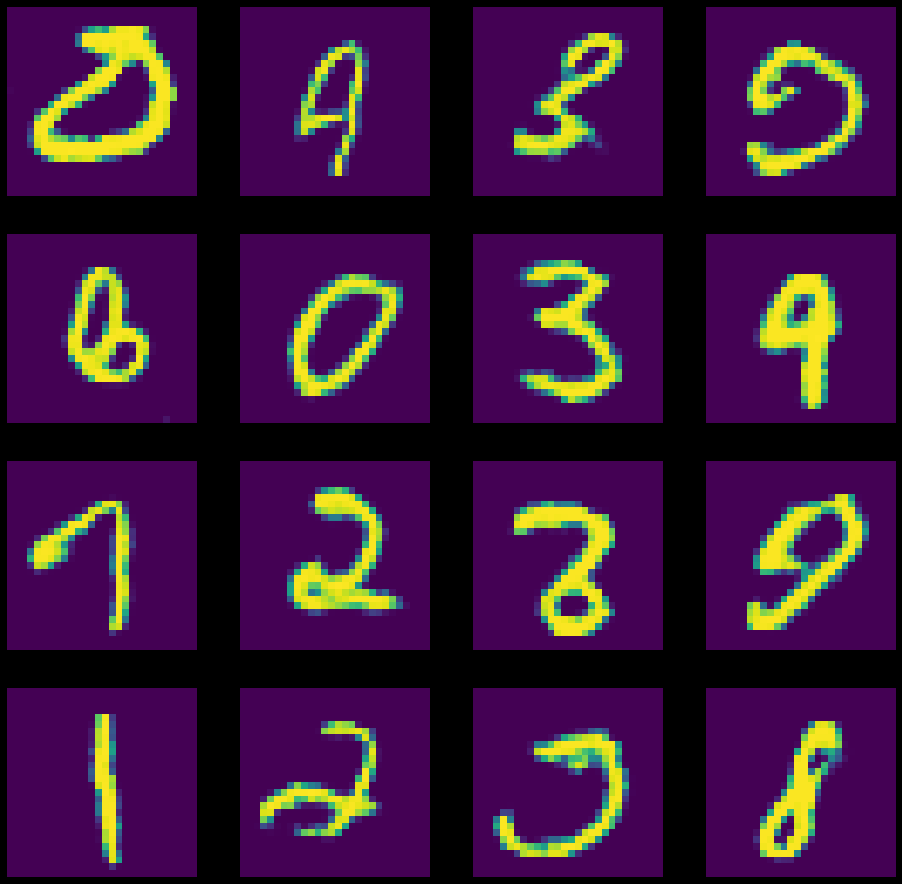

None
2188/2188 [==============================] - 17s 8ms/step - d_loss: 0.6861 - g_loss: 0.6695


In [11]:
g = gan.GAN(g=gen12, d=disc12, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [12]:
name = 'D_B_15-Sig-MultiDrop'
model15 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=8,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=True,
                             is_batchnorm=True,
                             is_tanh=False
                             )
gen15, disc15 = model.build(model15)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_10 (Dense)            (None, 12544)             1266944   
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 12544)             0         
                                                                 
 reshape_5 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_15 (Conv2D  (None, 14, 14, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

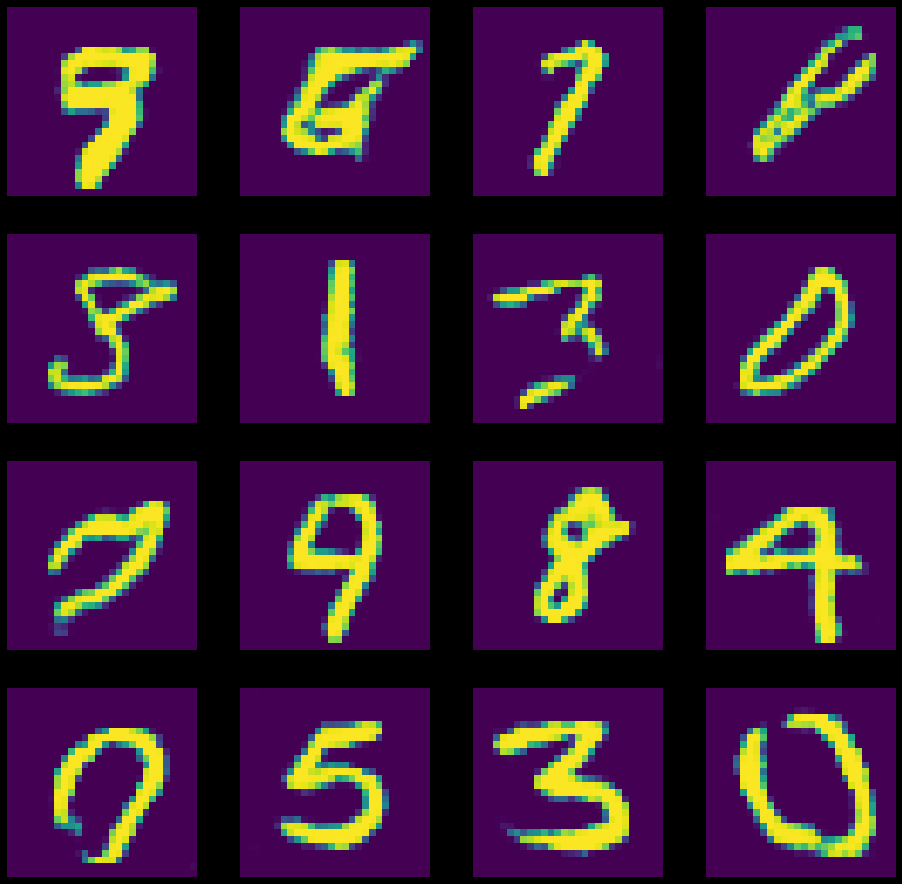

None
2188/2188 [==============================] - 38s 18ms/step - d_loss: 0.6444 - g_loss: 0.8040


In [13]:
g = gan.GAN(g=gen15, d=disc15, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [3]:
name = 'D_B_18-Sig-OneDrop'
model18 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=6,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=False,
                             is_batchnorm=True,
                             is_tanh=False
                             )
gen18, disc18 = model.build(model18)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 12544)             1266944   
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 128)      524416    
 nspose)                                                         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 128)       0         
                                                         

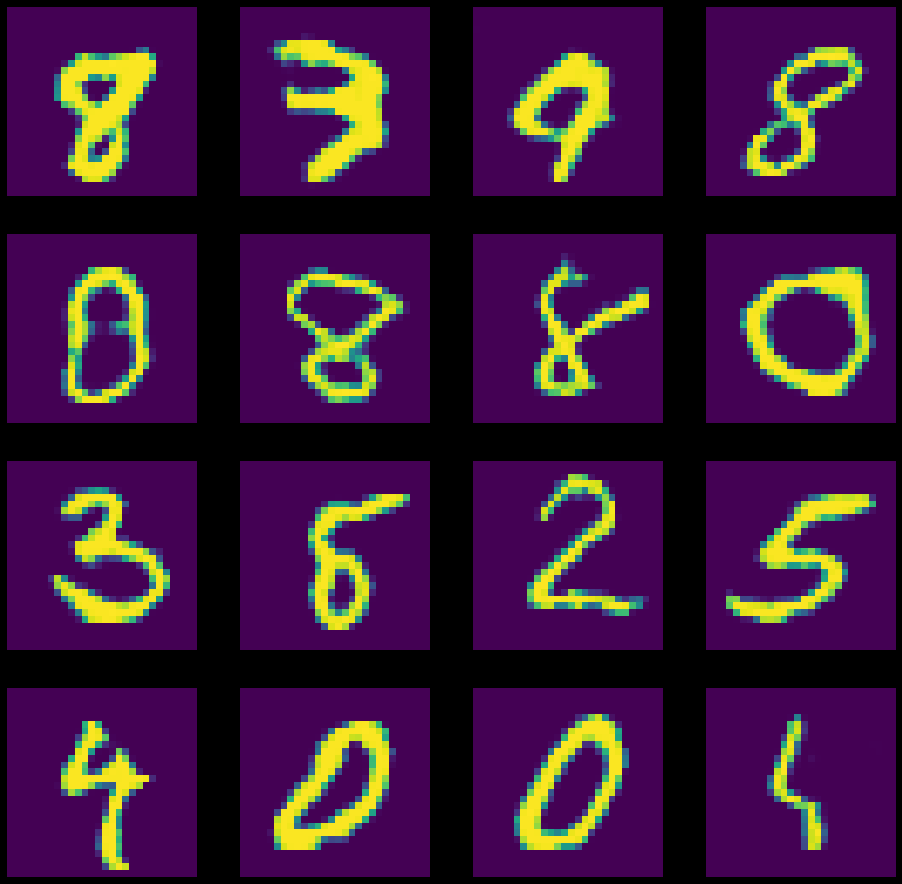

None
2188/2188 [==============================] - 27s 12ms/step - d_loss: 0.6925 - g_loss: 0.6482


In [4]:
g = gan.GAN(g=gen18, d=disc18, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [5]:
name = 'S_NB_15-Sig-MultiDrop'
model15 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=8,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=3,
                             is_multi_drop=True,
                             is_batchnorm=False,
                             is_tanh=False
                             )
gen15, disc15 = model.build(model15)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_2 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 14, 14, 128)      262272    
 ranspose)                                                       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                         

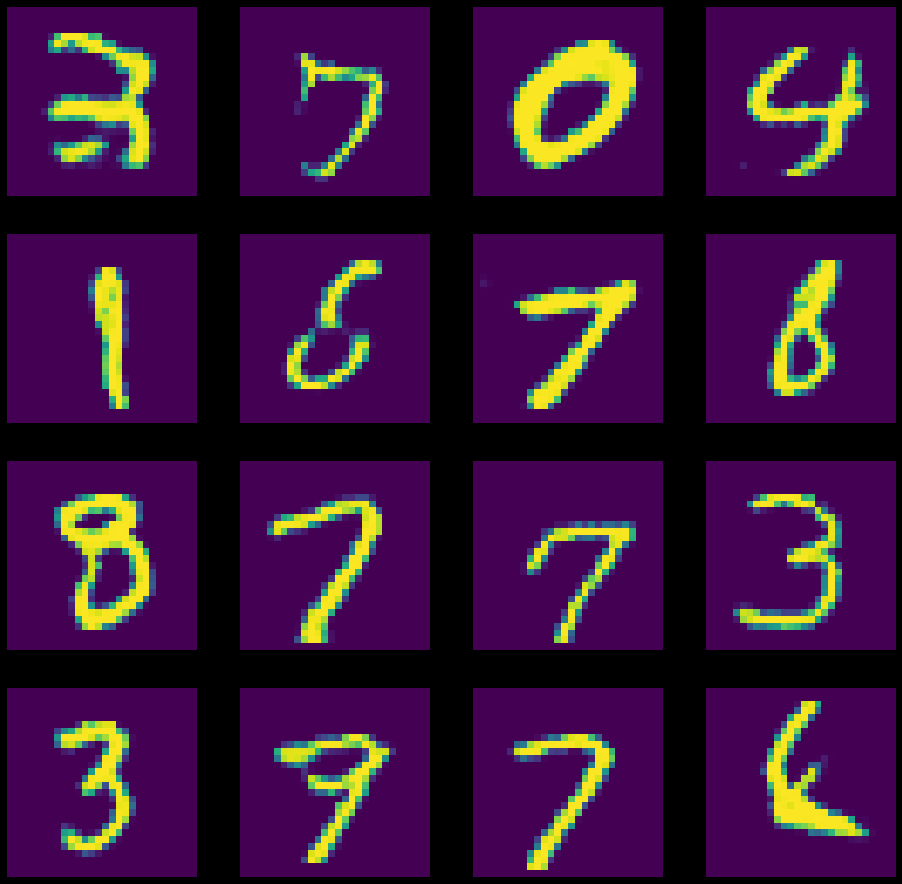

None
2188/2188 [==============================] - 52s 24ms/step - d_loss: 0.6266 - g_loss: 0.8647


In [6]:
g = gan.GAN(g=gen15, d=disc15, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [7]:
name = 'S_NB_20-Sig-OneDrop'
model20 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=7,
                              latent_dim=latent_dim,
                              filter_mode=3,
                              is_multi_drop=False,
                              is_batchnorm=False,
                              is_tanh=False
                              )
gen20, disc20 = model.build(model20)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_4 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 14, 14, 128)      262272    
 ranspose)                                                       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

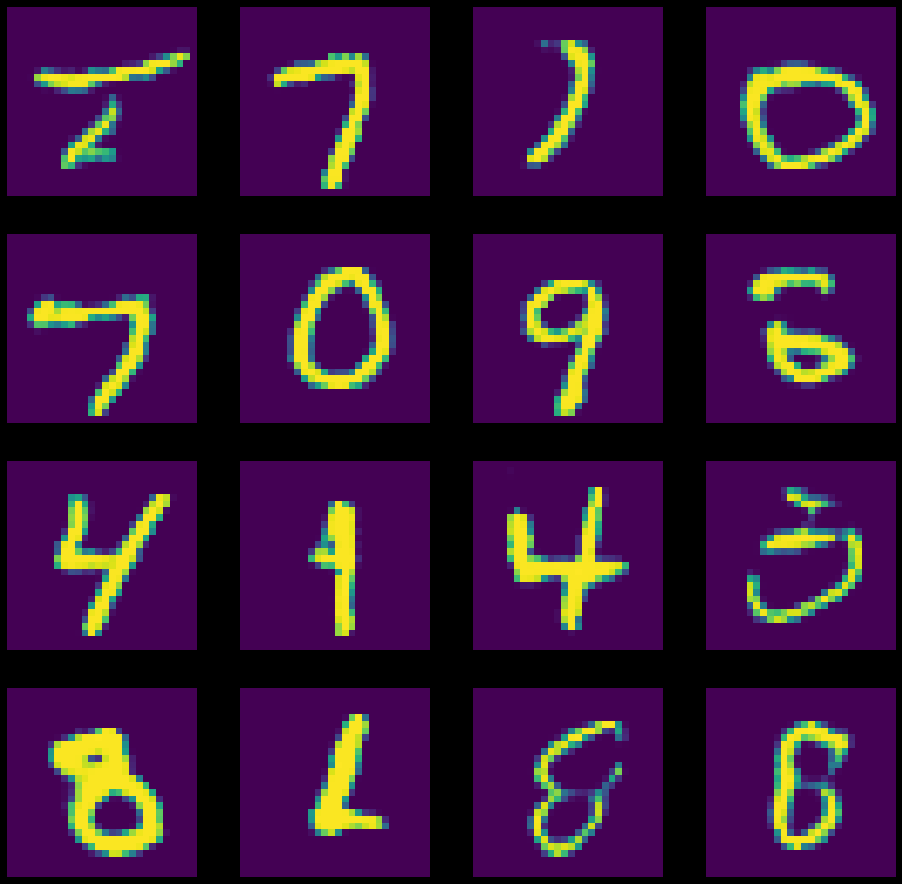

None
2188/2188 [==============================] - 51s 23ms/step - d_loss: 0.6252 - g_loss: 0.8704


In [8]:
g = gan.GAN(g=gen20, d=disc20, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [9]:
name = 'S_B_13-Sig-MultiDrop'
model13 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=6,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=3,
                             is_multi_drop=True,
                             is_batchnorm=True,
                             is_tanh=False
                             )
gen13, disc13 = model.build(model13)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_6 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_3 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_9 (Conv2DT  (None, 14, 14, 128)      262272    
 ranspose)                                                       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

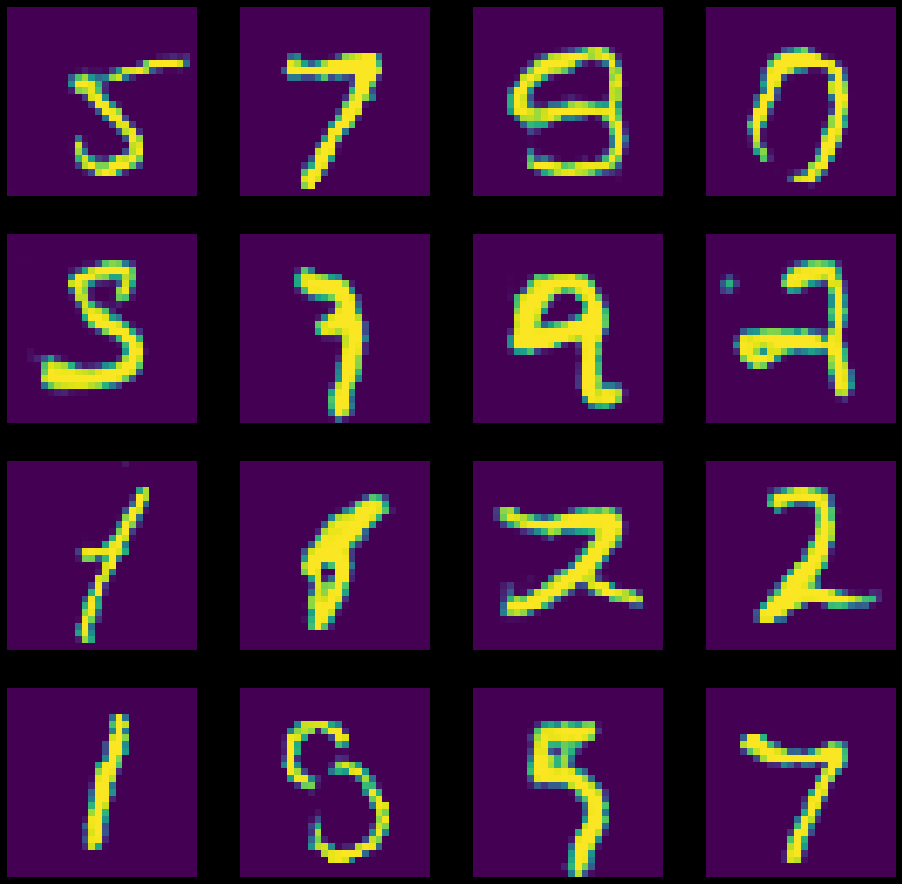

None
2188/2188 [==============================] - 29s 13ms/step - d_loss: 0.6889 - g_loss: 0.6607


In [10]:
g = gan.GAN(g=gen13, d=disc13, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [11]:
name = 'S_B_14-Sig-MultiDrop'
model14 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=7,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=3,
                             is_multi_drop=True,
                             is_batchnorm=True,
                             is_tanh=False
                             )
gen14, disc14 = model.build(model14)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_8 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_4 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_12 (Conv2D  (None, 14, 14, 128)      262272    
 Transpose)                                                      
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

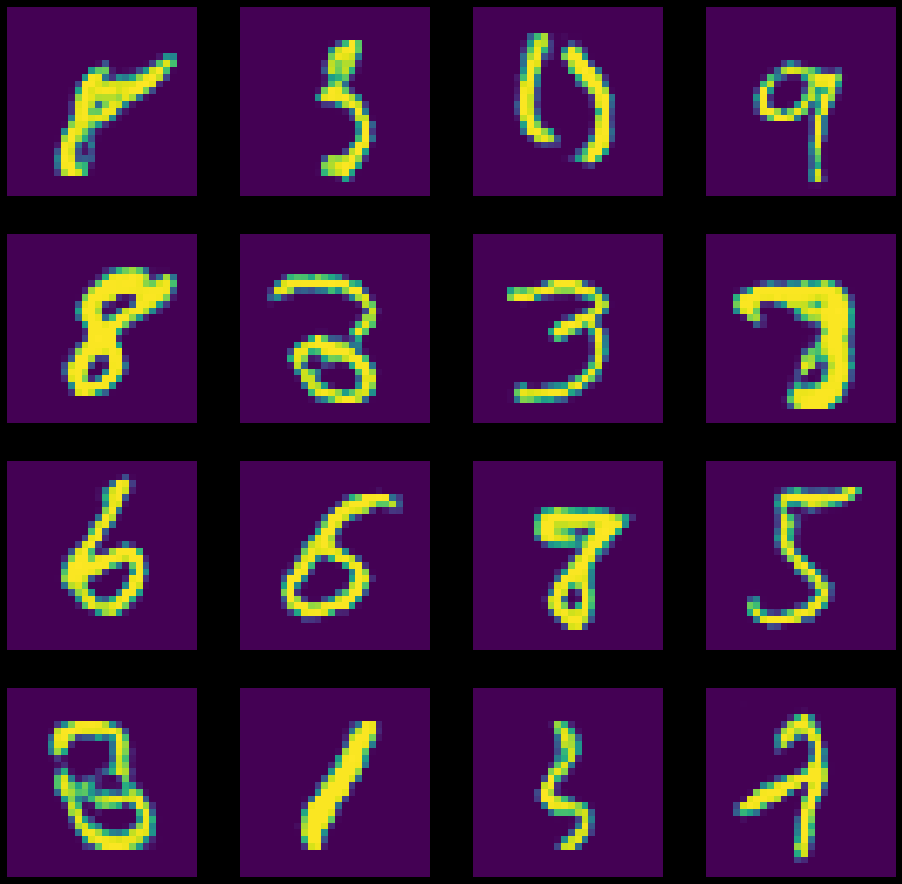

None
2188/2188 [==============================] - 34s 15ms/step - d_loss: 0.6618 - g_loss: 0.7454


In [12]:
g = gan.GAN(g=gen14, d=disc14, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [13]:
name = 'S_B_19-Sig-OneDrop'
model19 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=7,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=3,
                             is_multi_drop=False,
                             is_batchnorm=True,
                             is_tanh=False
                             )
gen19, disc19 = model.build(model19)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_10 (Dense)            (None, 6272)              633472    
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_5 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_15 (Conv2D  (None, 14, 14, 128)      262272    
 Transpose)                                                      
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

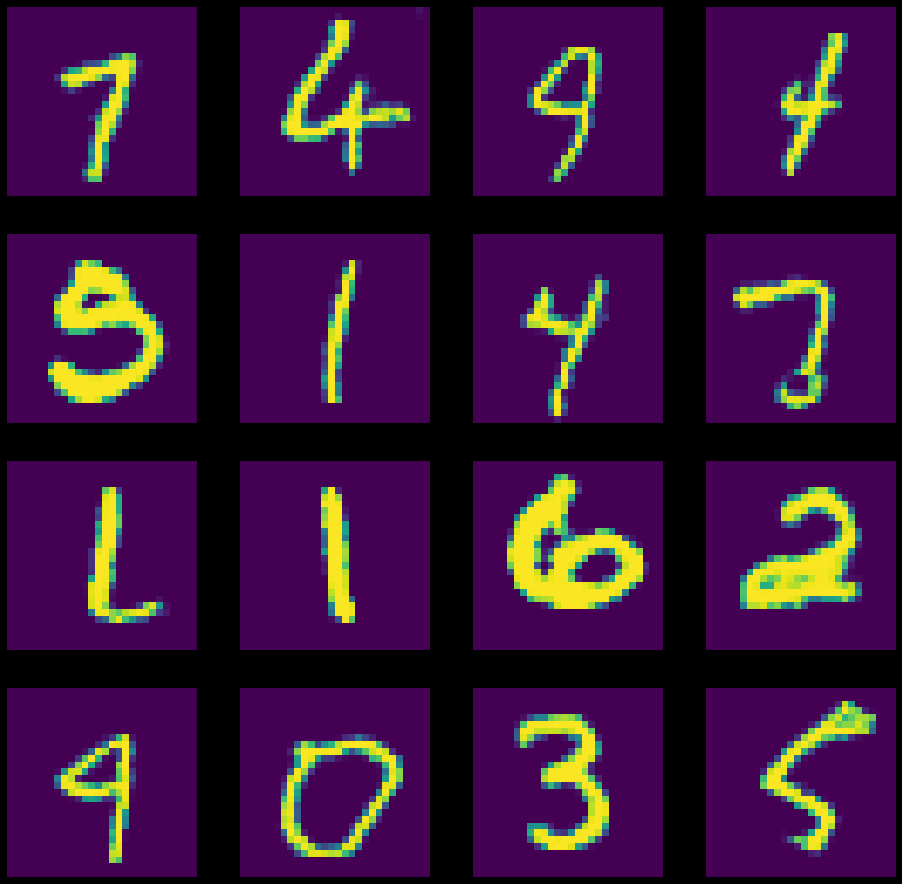

None
2188/2188 [==============================] - 34s 15ms/step - d_loss: 0.6670 - g_loss: 0.7312
Epoch 47/50
2181/2188 [============================>.] - ETA: 0s - d_loss: 0.6673 - g_loss: 0.7309

In [ ]:
g = gan.GAN(g=gen19, d=disc19, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])